## Final Project Submission

Please fill out:
* Student name: OOKO GRACE ANYANGO
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: ANTONNY MUIKO
* Blog post URL:


# Business Problem and Data Understanding

This notebook contains the introduction of our project, business problem, how our data was obtained and analysis of our data

# Overview

I have been tasked to anlyse data of King County houses based on certain featurs. So my goal is to analyze sale prices of houses so that they can use to make useful decisions. I have looked at the data and after careful examination I have decide on the features that I will use for this particular project for example building grade, square feet of living space, location.

# BUSINESS PROBLEM
A real estate company is looking for features that leads to high sales price of houses. We will review certain features like square feet for living space to determine which ones are highly correlated with home sale prices 

# HYPOTHESES
Null hypothesis(H0); There is no significant relationship between our independent variables and dependent variable, price.

Alternative Hypothesis(H1);  There is a relationship between our independent variables and our dependent variable, price.

I will be using significance level of 5% that is alpha 0.05 to make recommendations on our findings.

# DATA UNDERSTANDING
This project uses the King County House Sales dataset, which can be found in kc_house_data.csv in the data folder in this assignment's GitHub repository. The description of the column names can be found in column_names.md in the same folder. As with most real world data sets, the column names are not perfectly described, so you'll have to do some research or use your best judgment if you have questions about what the data means.
This file contains data for 21597 homes built in KC from 1900 to 2015. Each home in the set contains information regarding features such as zip code, square footage, number of bedrooms and bathrooms, number of floors, condition and more.

# METHODS

After exploring and processing data, simple and multiple linear regression models were built in OLS stats model, with price as the dependent variable.

# ANALYSIS QUESTIONS

1.Which features are highly most correlated with price?

2.which features have the strongest correlations with other predictor varibles?

3.What combinations of features is the best fit in terms of predictive power to predict house prices?

# Column Names and descriptions for King County Data Set
id - unique identified for a house

dateDate - house was sold

pricePrice - is prediction target

bedroomsNumber - of Bedrooms/House

bathroomsNumber - of bathrooms/bedrooms

sqft_livingsquare - footage of the home

sqft_lotsquare - footage of the lot

floorsTotal - floors (levels) in house

waterfront - House which has a view to a waterfront

view - Has been viewed

condition - How good the condition is ( Overall )

grade - overall grade given to the housing unit, based on King County grading system

sqft_above - square footage of house apart from basement

sqft_basement - square footage of the basement

yr_built - Built Year

yr_renovated - Year when house was renovated

zipcode - zip

lat - Latitude coordinate

long - Longitude coordinate

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

# previewing the data

In [510]:
# Your code here - remember to use markdown cells for comments as well!
#inporting the packages
import pandas as pd

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm

import scipy.stats as stats

%matplotlib inline

In [511]:
#dataset we will work with
#reading the csv file
df = pd.read_csv('kc_house_data.csv')

In [512]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [513]:
#getting info for dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

we can see that this is a large dataset containing more than 21 thousand entries and columns. Almost all of the columns contain numeric data which is convinient for linear regression.

In [514]:
#checking the shape
df.shape

(21597, 21)

This data has 21597 rows and 21 columns

CHECKING THE KIND OF DIATRIBUTION THE VARIABLES HAVE

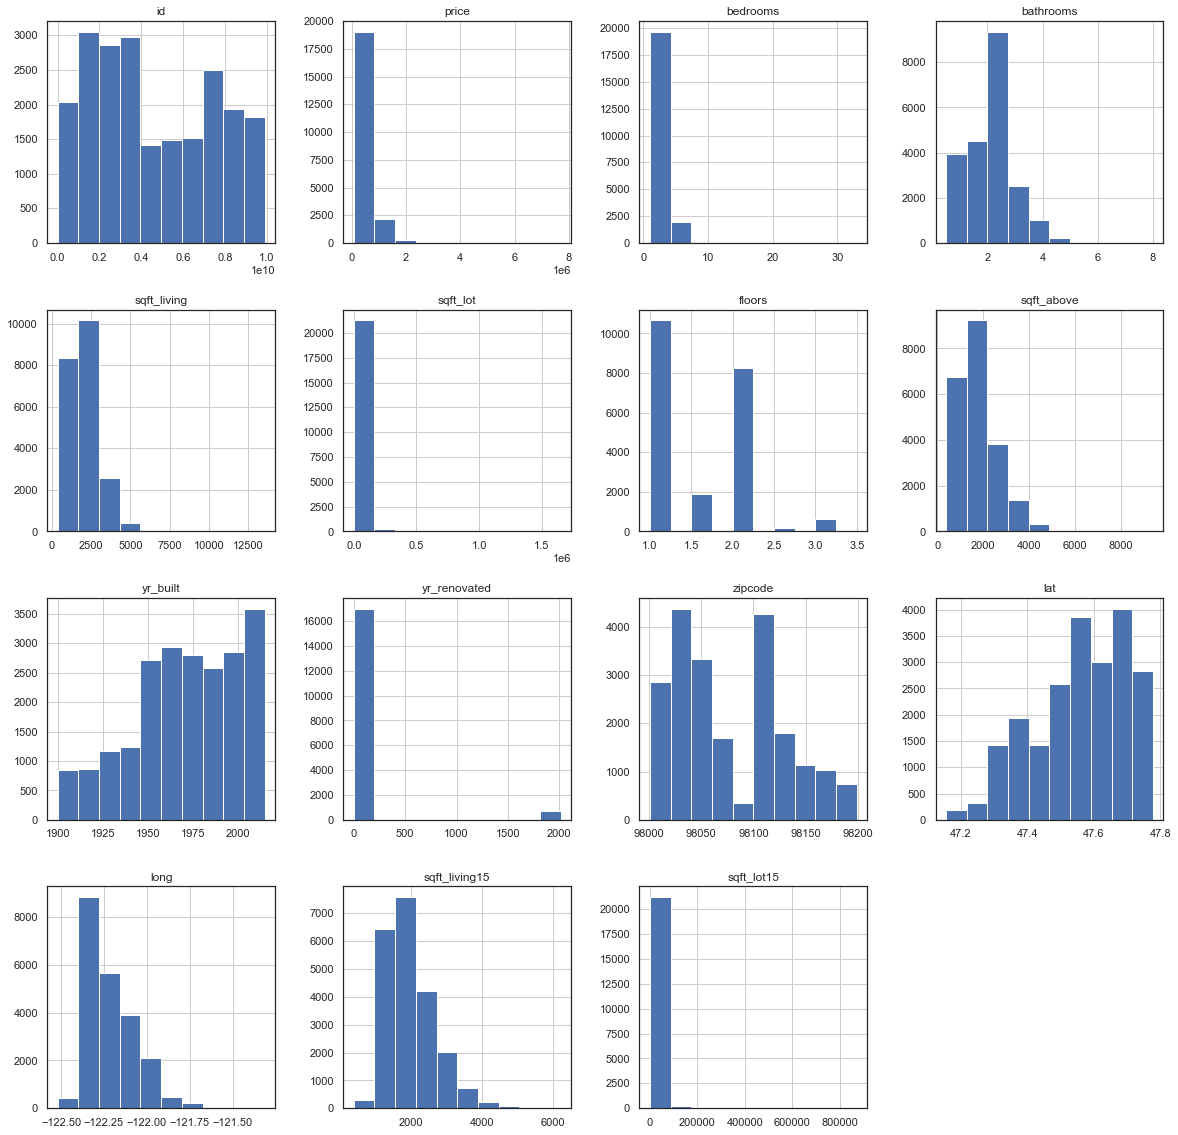

In [515]:
#let's look at the distributon of variables in a dataset to get a sense of the spread of various features.
df.hist(figsize=(20,20));

Many of the variables do not follow a normal distribution. This may lead to issues while satisfying all regression assumptions but I will address those issues as they arise.Regression does not require feautures to be normally distributed.

In [516]:
df.price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

The minimum price is about 78,000 dollars all the way up  to almost 8 million. The mean house price is 540,297 dollars whereas the median house price 450,000 dollars.

In [517]:
#checking the dispersion
df.yr_built.describe()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [518]:
#getting the counts for each values
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [519]:
#Getting the counts for zipcode
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [520]:
#getting descriptive statistics
df['sqft_living'].describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

The mean square feet of living  is 2080 but there are houses as large as 13540 sqft and as small as 370sqft

In [521]:
# display correlation
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.129599
floors           0.256804
lat              0.306692
bedrooms         0.308787
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

In [522]:
#checking for null values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

From the data waterfront has 2376 null values, view has 63 and yr renovated has 3842

# DATA PREPARATION

FEATURE ENGINEERING

First I split the date sold column into two separate column of months and years figuring that the specific day wouldn't have an impact on my model but month or year might have an impact. 

In [523]:
#Convert date column to 2 separate columns for month and year
date = df['date'].str.split('/', expand=True)
df['month_sold'] = date[0].astype('float64')
df['year_sold'] = date[2].astype('float64')

#Drop original date column
df.drop(columns=['date'], axis=1, inplace=True)

Then I converted the yerar built column into an age column to make the model more interpretable.since the last year was 2015. I created this column by substracting year built from 2015

In [524]:
#Convert year_built to age
df['age'] = 2015 - df.yr_built
df = df.drop(columns=['yr_built'], axis=1)

Changing yr_renovated to a binary column, whether homes were renovated in the last 10 years or built within the last 5.

In [525]:
#Create renovated column
df['renovated'] = df.year_sold - df.yr_renovated
#Replace any values less than 10 with 1, and any values over 10 with 0
renovated = df.renovated.values
age = df.age.values
values = np.where(renovated <= 10, 1, 0)
df['renovated'] = np.where(age <= 5, 1, values)
df.drop('yr_renovated', axis=1, inplace=True)

Dropping the column id because it is not  really needed

In [526]:
#Drop id column as it isnt relevant for our analysis
df.drop(columns=['id'], axis=1, inplace=True)


In [527]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age,renovated
0,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,...,0.0,98178,47.5112,-122.257,1340,5650,10.0,2014.0,60,0
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,...,400.0,98125,47.7210,-122.319,1690,7639,12.0,2014.0,64,0
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,...,0.0,98028,47.7379,-122.233,2720,8062,2.0,2015.0,82,0
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,...,910.0,98136,47.5208,-122.393,1360,5000,12.0,2014.0,50,0
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,...,0.0,98074,47.6168,-122.045,1800,7503,2.0,2015.0,28,0


DEALING WITH MISSING VALUES

In [533]:
#dealing with missing values
df.waterfront.value_counts()

NO     19075
0.0     2376
YES      146
Name: waterfront, dtype: int64

In [534]:
df.waterfront.fillna(0.0, inplace=True)

view column contains only 63 missing values, which can be filled with the median to avoid losing additional data.

In [535]:
df.view.value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
0.0             63
Name: view, dtype: int64

In [536]:
df['view'].fillna(0.0, inplace=True)

In [537]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month_sold       0
year_sold        0
age              0
renovated        0
dtype: int64

There are no missing values and the yr renovated has been changed to renovated.

NORMALISING THE DATA

In [563]:
def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in ['price','bedrooms', 'bathrooms', 'sqft_living',
       'sqft_above', 'sqft_living15']:
    df[feat] = norm_feat(df[feat])
df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15,price
count,2.113000e+04,21130.000000,2.113000e+04,2.113000e+04,21130.000000,2.113000e+04,2.113000e+04,21130.000000,2.113000e+04
mean,-2.891939e-17,0.000000,5.380352e-18,1.487402e+04,1.488949,1.076070e-17,-2.421158e-17,12618.365831,-5.380352e-18
std,1.000000e+00,1.000000,1.000000e+00,4.087236e+04,0.538879,1.000000e+00,1.000000e+00,26462.501021,1.000000e+00
min,-2.814140e+00,-2.200667,-5.021342e+00,5.200000e+02,1.000000,-1.769482e+00,-2.347028e+00,651.000000,-3.925736e+00
25%,-3.867410e-01,-0.809542,-6.433564e-01,5.025000e+03,1.000000,-7.352322e-01,-7.354078e-01,5100.000000,-6.844679e-01
50%,-3.867410e-01,0.233802,7.879190e-02,7.575500e+03,1.500000,-2.674329e-01,-2.136067e-01,7601.000000,-1.988084e-03
75%,8.269583e-01,0.581583,7.216164e-01,1.054075e+04,2.000000,5.345087e-01,5.616407e-01,10026.750000,6.619643e-01
max,2.040658e+00,3.016052,2.871336e+00,1.651359e+06,3.500000,7.751983e+00,6.316361e+00,871200.000000,3.908782e+00


ONE-HOT ENCODING

In [495]:
#Dealing with categorical variables
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [496]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [497]:
#making a copy
dummy_df= df[['condition', 'grade']].copy()
dummy_df.sample(8, random_state=70)

,condition,grade
9614,Average,7 Average
9,Average,7 Average
5682,Average,6 Low Average
428,Average,7 Average
7303,Average,8 Good
11300,Average,6 Low Average
2190,Average,9 Better
20297,Average,7 Average


In [498]:
#passing a categorical variable to another function
pd.get_dummies(df, columns=['condition','grade']).head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,-0.866696,-0.402894,-1.451039,-0.980629,5650,1.0,0,NONE,-0.735234,0.0,...,0,0,0,0,0,0,0,1,0,0
1,-0.006251,-0.402894,0.174482,0.533357,7242,2.0,NO,NONE,0.460766,400.0,...,0,0,0,0,0,0,0,1,0,0
2,-0.980751,-1.482459,-1.451039,-1.427201,10000,1.0,NO,NONE,-1.230546,0.0,...,0,0,0,0,0,0,1,0,0,0
3,0.173405,0.676671,1.149794,-0.131054,5000,1.0,NO,NONE,-0.892284,910.0,...,0,0,0,0,0,0,0,1,0,0
4,-0.082469,-0.402894,-0.150622,-0.436030,8080,1.0,NO,NONE,-0.131194,0.0,...,0,0,0,0,0,0,0,0,1,0


In [499]:
#Avoiding dummy variable trap
pd.get_dummies(df, columns=['condition','grade'], drop_first= True).head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,-0.866696,-0.402894,-1.451039,-0.980629,5650,1.0,0,NONE,-0.735234,0.0,...,0,0,0,0,0,0,0,1,0,0
1,-0.006251,-0.402894,0.174482,0.533357,7242,2.0,NO,NONE,0.460766,400.0,...,0,0,0,0,0,0,0,1,0,0
2,-0.980751,-1.482459,-1.451039,-1.427201,10000,1.0,NO,NONE,-1.230546,0.0,...,0,0,0,0,0,0,1,0,0,0
3,0.173405,0.676671,1.149794,-0.131054,5000,1.0,NO,NONE,-0.892284,910.0,...,0,0,0,0,0,0,0,1,0,0
4,-0.082469,-0.402894,-0.150622,-0.436030,8080,1.0,NO,NONE,-0.131194,0.0,...,0,0,0,0,0,0,0,0,1,0


In [500]:
# Cheking for duplicated rows
duplicates = df[df.duplicated()]
print(len(duplicates))

2


In [501]:
df.drop_duplicates().shape

(21595, 21)

DEALING WITH OUTLIERS

Otliers are sometimes left to reveal useful information about our data. But here we remove bedrooms and bathrooms outliers.

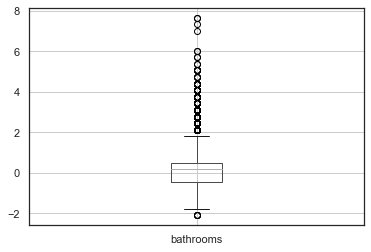

In [502]:
df.boxplot(column=['bathrooms']);

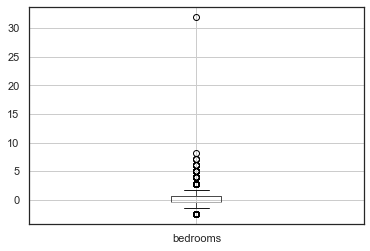

In [503]:
df.boxplot(column=['bedrooms']);

In [540]:
count = 0
bath_outliers = []
mean = np.mean(df['bathrooms'])
max_distance = np.std(df['bathrooms']) * 3 

for idx, row in df['bathrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        df.drop(idx, inplace=True)
count

0

In [542]:
count = 0
bed_outliers = []
mean = np.mean(df['bedrooms'])
max_distance = np.std(df['bedrooms']) * 3 

for idx, row in df['bedrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        df.drop(idx, inplace=True)
count

0

# MODELLING

A statistical model can be thought of as some kind of transformation that helps us express dependent variables as a function of one or more independent variables. It defines a realtionship between a dependent and independent variables.

In [543]:
#checking out which variables are most strongly correlated with price, as these variables will be good candidates for inclusion in our model
x_columns = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'grade',
       'sqft_above', 'sqft_living15', 'sqft_lot15']

#update dataframe to only include the above variables
df_clean = df[x_columns]
df_clean['price'] = df['price']
df = df_clean
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

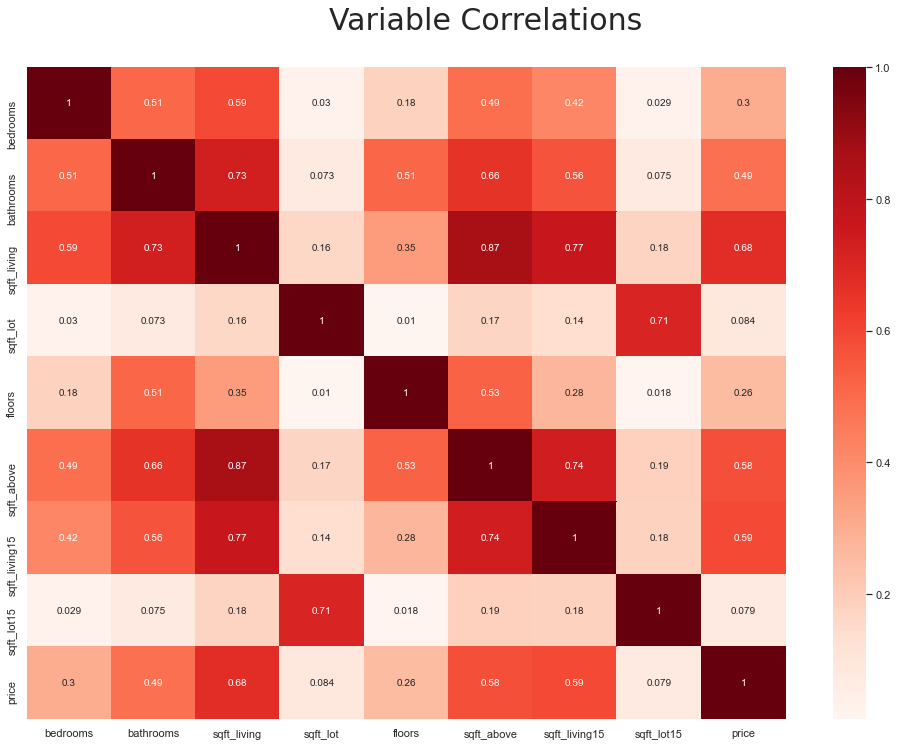

In [544]:
corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95, fontname='Silom')
heatmap = sns.heatmap(corr, cmap='Reds', annot=True);
heatmap

1.Which features are highly most correlated with price?

In [441]:
features = []
correlations = []
for idx, correlation in corr['price'].T.iteritems():
    if correlation >= .30 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)
print('Correlations with Price')
display(corr_price_df)

Correlations with Price


,Correlations,Features
2,0.677596,sqft_living
4,0.593674,sqft_living15
3,0.578363,sqft_above
1,0.489138,bathrooms
0,0.302105,bedrooms


Generally, any correlation above .7 is considered high. While there are no correlations with price above .7 in the dataset, there are several features with moderately strong correlations. Sqft_living, sqft_living15, sqft_above and bathrooms have the highest correlations with price.

Question 2: Which features have the strongest correlations with other predictor variables?


In [545]:
Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .80 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features}).sort_values(by=['Correlations'], ascending=False)

In [546]:
print('Multicollinear Features')
display(MC_df)

Multicollinear Features


,Correlations,Features
0,0.868369,"[sqft_living, sqft_above]"
1,0.868369,"[sqft_above, sqft_living]"


In [632]:
price = df['price']
bath = df['bathrooms']
bed = df['bedrooms']
sqft_living15 = df['sqft_living15']
sqft_living = df['sqft_living']
sqft_above = df['sqft_above']

<Figure size 432x288 with 0 Axes>

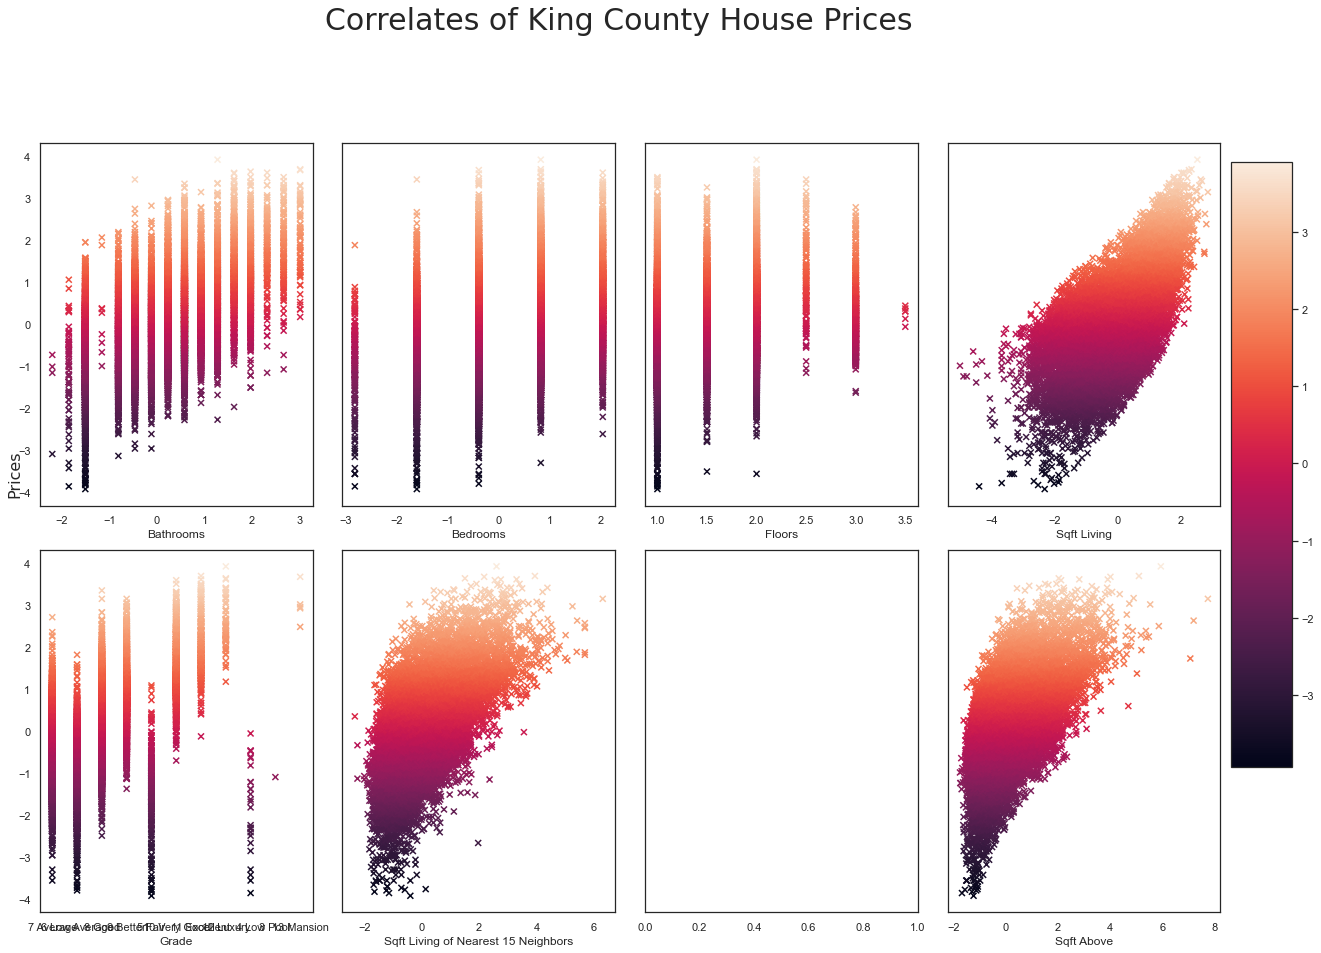

In [636]:
f = plt.figure()
f, axes = plt.subplots(nrows = 2, ncols = 4, sharex=False, sharey = True, figsize=(17,12))

f.suptitle('Correlates of King County House Prices', fontsize=30, y=1.1, fontname='Silom')
f.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16, fontname='Silom')

sc = axes[0][0].scatter(bath, price, c = price, marker = "x")
axes[0][0].set_xlabel('Bathrooms')

axes[0][1].scatter(bed, price, c = price, marker = "x")
axes[0][1].set_xlabel('Bedrooms')

axes[1][0].scatter(grade, price, c = price, marker = "x")
axes[1][0].set_xlabel('Grade')

axes[1][1].scatter(sqft_living15, price, c = price, marker = "x")
axes[1][1].set_xlabel('Sqft Living of Nearest 15 Neighbors')

axes[0][2].scatter(floors, price, c = price, marker = "x")
axes[0][2].set_xlabel('Floors')

sc = axes[0][3].scatter(sqft_living, price, c = price, marker = "x")
axes[0][3].set_xlabel('Sqft Living')

sc = axes[1][3].scatter(sqft_above, price, c = price, marker = "x")
axes[1][3].set_xlabel('Sqft Above')

cbar_ax = f.add_axes([1, 0.22, 0.05, 0.7])

f.colorbar(sc, cax=cbar_ax)

f.tight_layout()
plt.show()

MULTIPLE LINEAR REGRESSION

The goal of this project is to develop a multiple regression model for predicting price, we'll select final features by starting with feature-wise simple linear regression.

R-squared: 

This value tells us what proportion of the variability of y around its mean can be explained by the model. It can fall between 0 and 1, and a higher r-squared value indicates higher predictive power.
p-value: 

The null hypothesis for linear regression is that there is no relationship between the chosen explanatory variables and the response variable. Therefore, we want the model to have a p-value lower than .05 so we can reject the null hypothesis.
A simple linear regression model includes only one explanatory variable and one response variable. We'll create a simple linear regression model for each of the chosen explanatory variables that satisfy linearity, and test the assumptions for each. These variables are sqft_living, sqft_living15, bathrooms and grade.

MODEL 1

Regression models are evaluated against a "baseline". For simple linear regression, this baseline is an "intercept-only" model that just predicts the mean of the dependent variable every time. For multiple linear regression, we typically build a simple linear regression to be that baseline.

Since sqft living is the feature with the strongest correlation, let's build a simple linear regression with that.


In [603]:
y = df["price"]
X_baseline = df[["sqft_living"]]
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()
y = df["price"]
X_baseline = df[["sqft_living"]]
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                 1.503e+04
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:12:23   Log-Likelihood:                -24305.
No. Observations:               21130   AIC:                         4.861e+04
Df Residuals:                   21128   BIC:                         4.863e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.808e-17      0.005   3.44e-15      

R-squared: The r-squared value, 0.416, indicates that the model can account for about 42% of the variability of price around its mean.

p-value: PValue is 0, which means we can reject the null hypothesis and the model is significant

For each increase in sqft living, we see an associated increase in price by 0.6


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


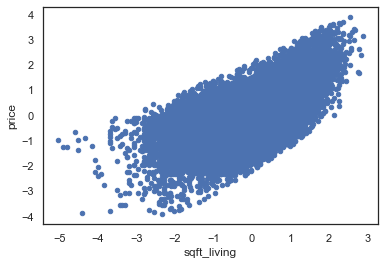

In [577]:
import warnings
warnings.filterwarnings('ignore')
df.plot.scatter(x="sqft_living", y="price");

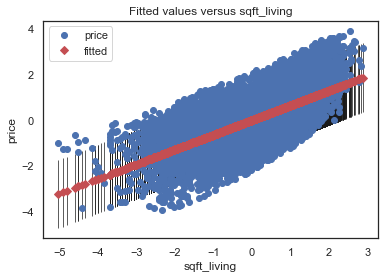

In [578]:
sm.graphics.plot_fit(baseline_results, 'sqft_living')
plt.show()

MODEL 2

Adding Another Independent Variable

Now let's expand from our simple linear regression to a multiple linear regression.we add bathrooms

The process of building this model with StatsModels is very similar to the process of building our baseline simple regression model; this time we simply create an X variable containing multiple columns.

In [579]:
X_second = df[["sqft_living", "bathrooms"]]
X_second

,sqft_living,bathrooms
0,-1.115093,-1.505104
1,0.772870,0.233802
2,-2.364608,-1.505104
3,0.164132,1.277145
4,-0.203921,-0.113979
...,...,...
21592,-0.435584,0.581583
21593,0.538775,0.581583
21594,-1.521647,-1.852886
21595,-0.323960,0.581583


In [580]:
second_model = sm.OLS(y, sm.add_constant(X_second))
second_results = second_model.fit()

print(second_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     7648.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:45:28   Log-Likelihood:                -24227.
No. Observations:               21130   AIC:                         4.846e+04
Df Residuals:                   21127   BIC:                         4.848e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.808e-17      0.005   3.45e-15      

The model is statistically significant overall, with an F-statistic p-value well below 0.05

The model explains about 42% of the variance in price.

The model coefficients (sqftliving, and bathrooms) are all statistically significant, with t-statistic p-values well below 0.05

For each increase of 1 in bathrooms, we see an associated increase in priceby 0.0986


Partial Regression Plot

Then, instead of a basic scatter plot with a best-fit line (since our model is now higher-dimensional), we'll use two partial regression plots, one for each of our predictors.

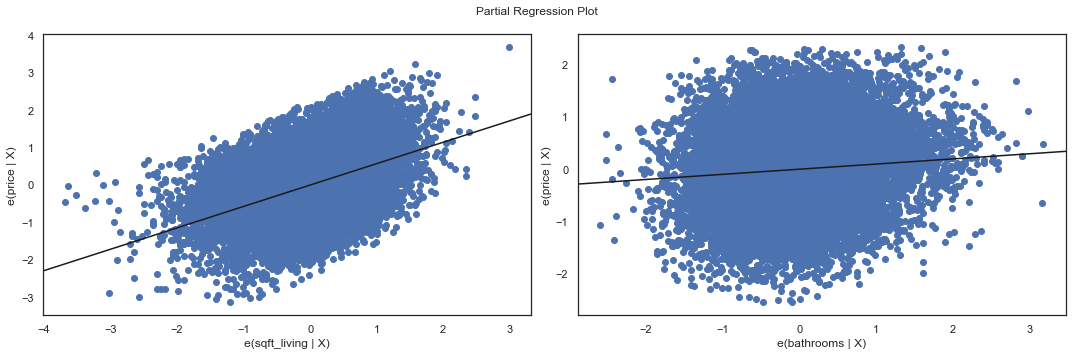

In [582]:
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(second_results, exog_idx=["sqft_living", "bathrooms"], fig=fig)
plt.tight_layout()
plt.show()

MODEL 3

Adding Another Independent Variable

Now let's expand from our simple linear regression to a multiple linear regression.we add sqft_living15

The process of building this model with StatsModels is very similar to the process of building our baseline simple regression model; this time we simply create an X variable containing multiple columns.

In [589]:

X_third = df[["sqft_living", "bathrooms",'sqft_living15']]
X_third

,sqft_living,bathrooms,sqft_living15
0,-1.115093,-1.505104,-0.944128
1,0.772870,0.233802,-0.422327
2,-2.364608,-1.505104,1.113259
3,0.164132,1.277145,-0.914311
4,-0.203921,-0.113979,-0.258333
...,...,...,...
21592,-0.435584,0.581583,-0.660865
21593,0.538775,0.581583,-0.213607
21594,-1.521647,-1.852886,-1.421204
21595,-0.323960,0.581583,-0.839768


In [590]:
third_model = sm.OLS(y, sm.add_constant(X_third))
third_results = third_model.fit()

print(third_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     5985.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:57:40   Log-Likelihood:                -23483.
No. Observations:               21130   AIC:                         4.697e+04
Df Residuals:                   21126   BIC:                         4.701e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.738e-18      0.005  -5.41e-16

The model is statistically significant overall, with an F-statistic p-value well below 0.05

The model explains about 46% of the variance in price.

The model coefficients (sqftliving,sqftliving15 and bathrooms) are all statistically significant, with t-statistic p-values well below 0.05

For each increase of 1 in sqft_living15, we see an associated increase in priceby 0.2852


MODEL 4

Adding Another Independent Variable

Now let's expand from our simple linear regression to a multiple linear regression.we add bedrooms

The process of building this model with StatsModels is very similar to the process of building our baseline simple regression model; this time we simply create an X variable containing multiple columns.

In [605]:
X_fourth = df[["sqft_living", "bathrooms","sqft_living15", "bedrooms"]]
X_fourth

,sqft_living,bathrooms,sqft_living15,bedrooms
0,-1.115093,-1.505104,-0.944128,-0.386741
1,0.772870,0.233802,-0.422327,-0.386741
2,-2.364608,-1.505104,1.113259,-1.600440
3,0.164132,1.277145,-0.914311,0.826958
4,-0.203921,-0.113979,-0.258333,-0.386741
...,...,...,...,...
21592,-0.435584,0.581583,-0.660865,-0.386741
21593,0.538775,0.581583,-0.213607,0.826958
21594,-1.521647,-1.852886,-1.421204,-1.600440
21595,-0.323960,0.581583,-0.839768,-0.386741


In [602]:
fourth_model = sm.OLS(y, sm.add_constant(X_forth))
fourth_results = fourth_model.fit()

print(forth_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     4636.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:08:00   Log-Likelihood:                -23324.
No. Observations:               21130   AIC:                         4.666e+04
Df Residuals:                   21125   BIC:                         4.670e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.738e-18      0.005  -5.45e-16

R-squared: The r-squared value, 0.467, indicates that the model can account for about 57%% of the variability of price around its mean.

p-value: All of the p-values round to 0, which means we can reject the null hypothesis.

Question 3: 

What combination of features is the best fit, in terms of predictive power, for a multiple regression model to predict house prices?

Grade, sqft_living and bathrooms are the best fit for a multiple regression model. These features are highly correlated with price, have relatively low multicollinearity, and can together account for more than half of the variability of price. 

All multiple regression assumptions are satisfied with these features included.

# Assumption Checks
There is still some multicollinearity with sqft_living and grade in this model, but by removing sqft_living15, we have reduced multicollinearity. We have already checked the homoscedasticity assumption for each predictor variable when diagnosing the simple linear regression models above. All that remains, then, is to check the normality of the model's residuals. We'll create a QQ-plot and confirm that the residuals fall along a straight line.

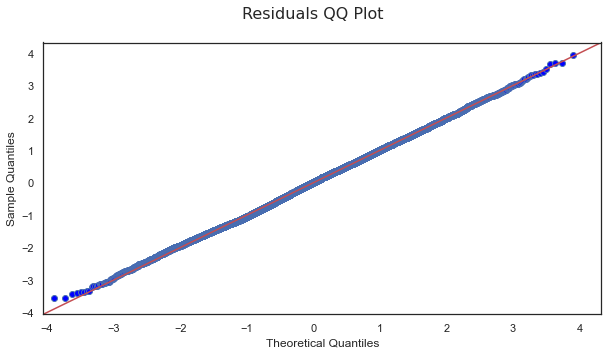

In [610]:
residuals = Model_3.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16, fontname='silom')
fig.set_size_inches(10, 5)
fig.show();

Almost all the datapoints fall along the straight line. We can consider normality assumption satidfied.

Question 3:

What combination of features is the best fit, in terms of predictive power, for a multiple regression model to predict house prices?

# VALIDATING THE MODEL

The final step is validating the data which checks how the data would perform from the new data with the same variables.By default, the function takes 75% of the data as the training subset and the other 25% as its test subset.

In [623]:
#create test and training data subsets
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df.price)
train, test = train_test_split(df,test_size=.25,shuffle=True)

In [624]:
df_train = pd.DataFrame(X_train, y_train)
df_test = pd.DataFrame(X_test, y_test)

In [625]:
#look at the shape of the subsets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(15847, 11) (15847,) (5283, 11) (5283,)


The MSE and r-squared values for the train and test subsets are similar. This suggests that the model will perform similarly on different data.

# CONCLUSIONS

I managed to build a multivariate predictive model with an R_squared of nearly 46%.

Together, square footage, grade and bathrooms are the best predictors of a house's price in King County. Homeowners who are interested in selling their homes at a higher price should focus on expanding square footage and improving the quality of construction. When expanding square footage, homeowners should consider building additional bathrooms, as this analysis suggests that number of bathrooms is positively related to price.

All the pvalues are below our alpha that is 0.05 so we reject null hypothesis and conclude that there is signicant realtionship between target variable price and independent variables.

# LIMITATIONS

The model does have some limitations: given that some of the variables needed to be log-transformed to satisfy regression assumptions, any new data used with the model would have to undergo similar preprocessing. Additionally, given regional differences in housing prices, the model's applicability to data from other counties may be limited. Given that outliers were removed, the model may also not accurately predict extreme values.

Future analysis should explore the best predictors of the prices of homes outside of King County, as well as homes with extreme price values.
